# Notebook to combine all well data for visualization

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

%matplotlib inline

In [4]:
data = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "../data/wells/*.csv"))), sort=False)
data.to_csv('../data/all_wells.csv', index=False)

In [5]:
data.head()

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,proppant weight (lbs),pump rate (cubic feet/min),...,water 3,water 4,water 5,water 6,water 7,water 8,water 9,water 10,water 11,water 12
0,32600.0,52200.0,0.04,0.006,0.31,1.224949e+07,0.141918,0.858082,1.059118e+06,220.584462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32703.0,52200.0,0.02,0.001,0.31,1.224911e+07,0.141804,0.858196,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32807.0,52200.0,0.03,0.002,0.31,1.224864e+07,0.141688,0.858312,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32910.0,52200.0,0.04,0.008,0.31,1.224807e+07,0.141571,0.858429,5.634563e+05,286.379301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33014.0,52200.0,0.03,0.004,0.31,1.224740e+07,0.141452,0.858548,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def plot_feature(feature):
    plt.xlabel('easting')
    plt.ylabel('northing')
    plt.title(feature)
    plt.scatter(data['easting'], data['northing'], c=data[feature])
    plt.colorbar(label=feature)

Visualizing porosity

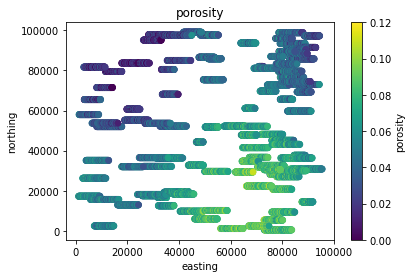

In [7]:
plot_feature('porosity')

Plotting permeability

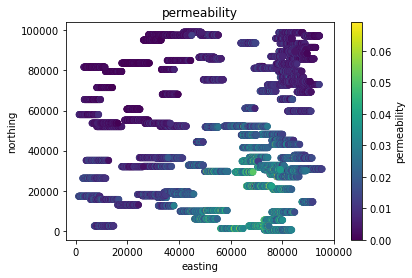

In [8]:
plot_feature('permeability')

Plotting Poisson's ratio

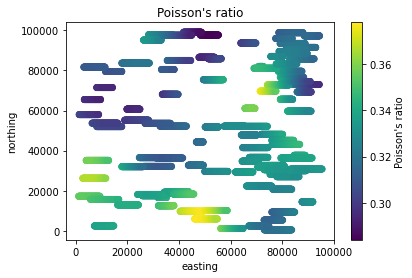

In [9]:
plot_feature('Poisson\'s ratio')

Plotting water saturation

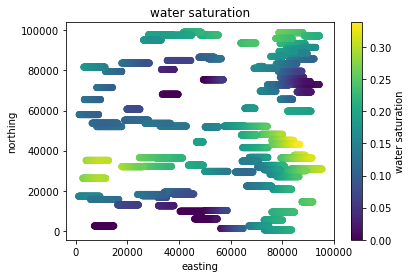

In [10]:
plot_feature('water saturation')

Plotting oil saturation

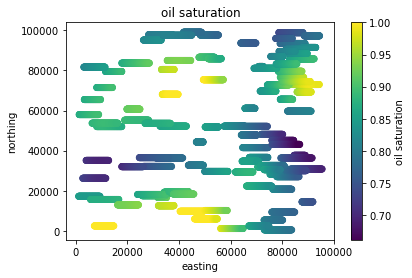

In [11]:
plot_feature('oil saturation')